# Proficiency Test

### Oleh Hendri Prabowo

## Import Data and Load Library

In [65]:
# Load library
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import matplotlib.mlab as mlab
import matplotlib.cm as cm
from scipy.stats import chi2_contingency

In [2]:
# Import data
data_2018=pd.read_csv('Crime2018.csv')
data_2019=pd.read_csv('Crime2019.csv')
data_2020=pd.read_csv('Crime2020.csv')
data_2020.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [3]:
# Cbind data
data=data_2018.append(data_2019).append(data_2020).reset_index(drop=True)
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,NaN,INVESTIGATE PROPERTY,A7,21,0,2020-09-01 00:00:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
189560,20062356,1107,NaN,FRAUD - IMPERSONATION,E18,520,0,2020-08-28 18:39:00,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
189561,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,2020-07-02 01:38:00,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
189562,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,2020-06-03 01:15:00,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


In [4]:
# simpan data
data.to_csv('data.csv')

## EDA (No 3)

In [5]:
# Check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189564 entries, 0 to 189563
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      189564 non-null  object 
 1   OFFENSE_CODE         189564 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  189564 non-null  object 
 4   DISTRICT             188527 non-null  object 
 5   REPORTING_AREA       189564 non-null  object 
 6   SHOOTING             91078 non-null   object 
 7   OCCURRED_ON_DATE     189564 non-null  object 
 8   YEAR                 189564 non-null  int64  
 9   MONTH                189564 non-null  int64  
 10  DAY_OF_WEEK          189564 non-null  object 
 11  HOUR                 189564 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               187948 non-null  object 
 14  Lat                  183135 non-null  float64
 15  Long             

In [6]:
# Convert year, hour dan month ke str serta date
data['YEAR'] = data['YEAR'].apply(str)
data['MONTH'] = data['MONTH'].apply(str)
data['HOUR'] = data['HOUR'].apply(str)
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189564 entries, 0 to 189563
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      189564 non-null  object        
 1   OFFENSE_CODE         189564 non-null  int64         
 2   OFFENSE_CODE_GROUP   98888 non-null   object        
 3   OFFENSE_DESCRIPTION  189564 non-null  object        
 4   DISTRICT             188527 non-null  object        
 5   REPORTING_AREA       189564 non-null  object        
 6   SHOOTING             91078 non-null   object        
 7   OCCURRED_ON_DATE     189564 non-null  datetime64[ns]
 8   YEAR                 189564 non-null  object        
 9   MONTH                189564 non-null  object        
 10  DAY_OF_WEEK          189564 non-null  object        
 11  HOUR                 189564 non-null  object        
 12  UCR_PART             98868 non-null   object        
 13  STREET        

In [7]:
# Check data value di OFFENSE_CODE  
data.OFFENSE_CODE.value_counts()

3115     11807
3006     10072
3831      9827
1402      8238
3114      7894
         ...  
1500         1
99999        1
2605         1
600          1
2600         1
Name: OFFENSE_CODE, Length: 205, dtype: int64

In [8]:
# Check data value di OFFENSE_DESCRIPTION  
data.OFFENSE_DESCRIPTION.value_counts()

INVESTIGATE PERSON                                               11807
SICK/INJURED/MEDICAL - PERSON                                    10072
M/V - LEAVING SCENE - PROPERTY DAMAGE                             9827
VANDALISM                                                         8238
INVESTIGATE PROPERTY                                              7894
                                                                 ...  
Justifiable Homicide                                                 1
HUMAN TRAFFICKING - COMMERCIAL SEX ACTS                              1
Migrated Report - Weapons Violation                                  1
Migrated Report - Other Larceny                                      1
Migrated Report - Drugs - Possession/Manufacturing/Distribute        1
Name: OFFENSE_DESCRIPTION, Length: 231, dtype: int64

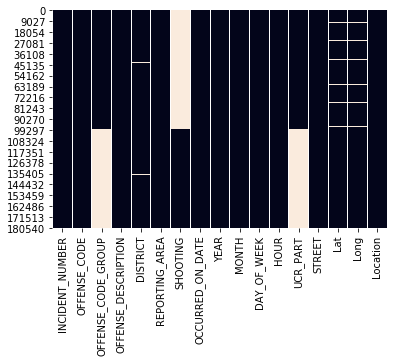

In [28]:
# Visualisasi missing value
sns.heatmap(data.isnull(), cbar=False)

In [9]:
# Jumlah missing value
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 17 columns and 189564 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
SHOOTING,89358,98486,52.0,187844,99.1,object
UCR_PART,0,90696,47.8,90696,47.8,object
OFFENSE_CODE_GROUP,0,90676,47.8,90676,47.8,object
Lat,2100,6429,3.4,8529,4.5,float64
Long,2100,6429,3.4,8529,4.5,float64
STREET,0,1616,0.9,1616,0.9,object
DISTRICT,0,1037,0.5,1037,0.5,object


In [10]:
# Drop kolom SHOOTING, UCR_PART, dan OFFENSE_CODE_GROUP (missing value>40%)
data.drop("SHOOTING", axis=1, inplace = True)
data.drop("UCR_PART", axis=1, inplace = True)
data.drop("OFFENSE_CODE_GROUP", axis=1, inplace = True)
missing_zero_values_table(data)

Your selected dataframe has 14 columns and 189564 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Lat,2100,6429,3.4,8529,4.5,float64
Long,2100,6429,3.4,8529,4.5,float64
STREET,0,1616,0.9,1616,0.9,object
DISTRICT,0,1037,0.5,1037,0.5,object


In [11]:
# Menambah kolom baru yaitu week of year
data['Week_Of_Year'] = data['OCCURRED_ON_DATE'].dt.weekofyear
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Week_Of_Year
0,I192077559,3115,INVESTIGATE PERSON,B3,468,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",18
1,I192077332,619,LARCENY ALL OTHERS,E18,496,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",10
2,I192076660,2629,HARASSMENT,E5,662,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",44
3,I192075386,2629,HARASSMENT,A1,96,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",15
4,I192075335,3208,PROPERTY - MISSING,D4,132,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,INVESTIGATE PROPERTY,A7,21,2020-09-01 00:00:00,2020,9,Tuesday,0,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)",36
189560,20062356,1107,FRAUD - IMPERSONATION,E18,520,2020-08-28 18:39:00,2020,8,Friday,18,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)",35
189561,20046400,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,2020-07-02 01:38:00,2020,7,Thursday,1,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)",27
189562,20038446,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,2020-06-03 01:15:00,2020,6,Wednesday,1,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)",23


In [32]:
# simpan data
data.to_csv('data_weekofyear.csv')

In [12]:
# Cek duplikasi data
data[data.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Week_Of_Year
1843,I182104066,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,434,2018-12-27 00:34:00,2018,12,Thursday,0,DYER ST,42.283369,-71.080380,"(42.28336878, -71.08038038)",52
1844,I182104066,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,434,2018-12-27 00:34:00,2018,12,Thursday,0,DYER ST,42.283369,-71.080380,"(42.28336878, -71.08038038)",52
1921,I182103979,3502,MISSING PERSON - LOCATED,B2,319,2018-12-23 18:00:00,2018,12,Sunday,18,CHENEY ST,42.309700,-71.085824,"(42.30970016, -71.08582414)",51
3033,I182102694,3201,PROPERTY - LOST,B3,469,2018-12-21 06:00:00,2018,12,Friday,6,BLUE HILL AVE,42.275679,-71.093640,"(42.27567917, -71.09363988)",51
3195,I182102518,3001,DEATH INVESTIGATION,E13,637,2018-12-20 12:49:00,2018,12,Thursday,12,BOYLSTON ST,42.318581,-71.109899,"(42.31858074, -71.10989890)",51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98880,I070720870-00,3125,WARRANT ARREST,B2,318,2018-12-13 00:00:00,2018,12,Thursday,0,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)",50
98881,I070720870-00,3125,WARRANT ARREST,B2,318,2018-12-13 00:00:00,2018,12,Thursday,0,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)",50
98883,I070720870-00,802,ASSAULT & BATTERY,B2,318,2018-12-13 00:00:00,2018,12,Thursday,0,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)",50
98884,I070720870-00,3125,WARRANT ARREST,B2,318,2018-12-13 00:00:00,2018,12,Thursday,0,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)",50


In [13]:
# Drop duplicates data
data_drop=data
data_drop.drop_duplicates(subset=None, inplace=True)
data_drop

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Week_Of_Year
0,I192077559,3115,INVESTIGATE PERSON,B3,468,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",18
1,I192077332,619,LARCENY ALL OTHERS,E18,496,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",10
2,I192076660,2629,HARASSMENT,E5,662,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",44
3,I192075386,2629,HARASSMENT,A1,96,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",15
4,I192075335,3208,PROPERTY - MISSING,D4,132,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,INVESTIGATE PROPERTY,A7,21,2020-09-01 00:00:00,2020,9,Tuesday,0,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)",36
189560,20062356,1107,FRAUD - IMPERSONATION,E18,520,2020-08-28 18:39:00,2020,8,Friday,18,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)",35
189561,20046400,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,2020-07-02 01:38:00,2020,7,Thursday,1,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)",27
189562,20038446,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,2020-06-03 01:15:00,2020,6,Wednesday,1,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)",23


In [36]:
# simpan data
data_drop.to_csv('data_preprocess.csv')

## Python (No 5)

In [38]:
# panggil data yang telah digabung
import pandas as pd
data_gabung=pd.read_csv('data_preprocess.csv')
data_gabung=data_gabung.iloc[:,1:]
data_gabung

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Week_Of_Year
0,I192077559,3115,INVESTIGATE PERSON,B3,468,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",18
1,I192077332,619,LARCENY ALL OTHERS,E18,496,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",10
2,I192076660,2629,HARASSMENT,E5,662,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",44
3,I192075386,2629,HARASSMENT,A1,96,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",15
4,I192075335,3208,PROPERTY - MISSING,D4,132,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189398,20063425,3114,INVESTIGATE PROPERTY,A7,21,2020-09-01 00:00:00,2020,9,Tuesday,0,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)",36
189399,20062356,1107,FRAUD - IMPERSONATION,E18,520,2020-08-28 18:39:00,2020,8,Friday,18,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)",35
189400,20046400,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,2020-07-02 01:38:00,2020,7,Thursday,1,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)",27
189401,20038446,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,2020-06-03 01:15:00,2020,6,Wednesday,1,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)",23


In [60]:
# No 1
conditions=[(data_gabung['DISTRICT']=='A1'),
           (data_gabung['DISTRICT']=='A7'),
           (data_gabung['DISTRICT']=='A15'),
           (data_gabung['DISTRICT']=='B2'),
           (data_gabung['DISTRICT']=='B3'),
           (data_gabung['DISTRICT']=='C6'),
           (data_gabung['DISTRICT']=='C11'),
           (data_gabung['DISTRICT']=='D4'),
           (data_gabung['DISTRICT']=='D14'),
           (data_gabung['DISTRICT']=='E5'),
           (data_gabung['DISTRICT']=='E13'),
           (data_gabung['DISTRICT']=='E18')]
values=['A','A','A','B','B','C','C','D','D','E','E','E']
data_gabung['Distric_Code'] = np.select(conditions, values)
data_gabung.Distric_Code.value_counts(dropna=True,ascending=False)

B    50329
C    38708
D    36530
A    32270
E    30209
0     1357
Name: Distric_Code, dtype: int64

In [78]:
# No 2
data_gabung.OFFENSE_DESCRIPTION[data_gabung['YEAR']==2020][~data_gabung.OFFENSE_DESCRIPTION[data_gabung['YEAR']==2020].isin(data_gabung.OFFENSE_DESCRIPTION[data_gabung['YEAR']==2019])].drop_duplicates()

121384                  TRUANCY / RUNAWAY
124737     EXPLOSIVES - POSSESSION OR USE
125152                OBSCENE PHONE CALLS
129277    EXPLOSIVES - TURNED IN OR FOUND
145630         Evidence Tracker Incidents
179694               Justifiable Homicide
Name: OFFENSE_DESCRIPTION, dtype: object

In [85]:
# No 3
data_gabung.OFFENSE_DESCRIPTION[(data_gabung['Week_Of_Year']>=40) & (data_gabung['Week_Of_Year']<=45)].value_counts(dropna=True,ascending=False).head(n=5)

INVESTIGATE PERSON                       1791
M/V - LEAVING SCENE - PROPERTY DAMAGE    1611
SICK/INJURED/MEDICAL - PERSON            1410
VANDALISM                                1262
INVESTIGATE PROPERTY                     1217
Name: OFFENSE_DESCRIPTION, dtype: int64

In [88]:
# No 4
conditions=[(data_gabung['DISTRICT']=='A1'),
           (data_gabung['DISTRICT']=='A7'),
           (data_gabung['DISTRICT']=='A15'),
           (data_gabung['DISTRICT']=='B2'),
           (data_gabung['DISTRICT']=='B3'),
           (data_gabung['DISTRICT']=='C6'),
           (data_gabung['DISTRICT']=='C11'),
           (data_gabung['DISTRICT']=='D4'),
           (data_gabung['DISTRICT']=='D14'),
           (data_gabung['DISTRICT']=='E5'),
           (data_gabung['DISTRICT']=='E13'),
           (data_gabung['DISTRICT']=='E18')]
values=['A','A','A','B','B','C','C','D','D','E','E','E']
data_gabung['Distric_Code'] = np.select(conditions, values)
data_gabung.Distric_Code[(data_gabung['DAY_OF_WEEK']=='Saturday') | (data_gabung['DAY_OF_WEEK']=='Sunday')].value_counts(dropna=True,ascending=True)

0      351
E     7572
A     8818
D     9813
C    10278
B    13218
Name: Distric_Code, dtype: int64

In [89]:
# No 5
conditions=[(data_gabung['DISTRICT']=='A1'),
           (data_gabung['DISTRICT']=='A7'),
           (data_gabung['DISTRICT']=='A15'),
           (data_gabung['DISTRICT']=='B2'),
           (data_gabung['DISTRICT']=='B3'),
           (data_gabung['DISTRICT']=='C6'),
           (data_gabung['DISTRICT']=='C11'),
           (data_gabung['DISTRICT']=='D4'),
           (data_gabung['DISTRICT']=='D14'),
           (data_gabung['DISTRICT']=='E5'),
           (data_gabung['DISTRICT']=='E13'),
           (data_gabung['DISTRICT']=='E18')]
values=['A','A','A','B','B','C','C','D','D','E','E','E']
data_gabung['Distric_Code'] = np.select(conditions, values)
data_gabung.Distric_Code[(data_gabung['DAY_OF_WEEK']=='Monday') | (data_gabung['DAY_OF_WEEK']=='Tuesday')| (data_gabung['DAY_OF_WEEK']=='Wednesday')| (data_gabung['DAY_OF_WEEK']=='Thursday')| (data_gabung['DAY_OF_WEEK']=='Friday')].value_counts(dropna=True,ascending=False)

B    37111
C    28430
D    26717
A    23452
E    22637
0     1006
Name: Distric_Code, dtype: int64

## Machine Learning (No 6)

In [29]:
data_ml=data_drop
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189403 entries, 0 to 189563
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      189403 non-null  object        
 1   OFFENSE_CODE         189403 non-null  int64         
 2   OFFENSE_DESCRIPTION  189403 non-null  object        
 3   DISTRICT             188366 non-null  object        
 4   REPORTING_AREA       189403 non-null  object        
 5   OCCURRED_ON_DATE     189403 non-null  datetime64[ns]
 6   YEAR                 189403 non-null  object        
 7   MONTH                189403 non-null  object        
 8   DAY_OF_WEEK          189403 non-null  object        
 9   HOUR                 189403 non-null  object        
 10  STREET               187792 non-null  object        
 11  Lat                  182982 non-null  float64       
 12  Long                 182982 non-null  float64       
 13  Location      

In [30]:
# Feature selection
data_ml=data_ml[['HOUR','DISTRICT','OFFENSE_DESCRIPTION','DAY_OF_WEEK','MONTH']].reset_index(drop=True)
data_ml

,HOUR,DISTRICT,OFFENSE_DESCRIPTION,DAY_OF_WEEK,MONTH
0,9,B3,INVESTIGATE PERSON,Monday,4
1,8,E18,LARCENY ALL OTHERS,Tuesday,3
2,12,E5,HARASSMENT,Wednesday,10
3,8,A1,HARASSMENT,Monday,4
4,0,D4,PROPERTY - MISSING,Monday,1
...,...,...,...,...,...
189398,0,A7,INVESTIGATE PROPERTY,Tuesday,9
189399,18,E18,FRAUD - IMPERSONATION,Friday,8
189400,1,B2,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,Thursday,7
189401,1,B2,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,Wednesday,6


In [31]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189403 entries, 0 to 189402
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   HOUR                 189403 non-null  object
 1   DISTRICT             188366 non-null  object
 2   OFFENSE_DESCRIPTION  189403 non-null  object
 3   DAY_OF_WEEK          189403 non-null  object
 4   MONTH                189403 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [19]:
# Check correlation hour vs district
mat1=pd.crosstab(index=data_ml['HOUR'],columns=data_ml['DISTRICT'])
stat1, p1, dof1, expected1 = chi2_contingency(mat1)
p1

5.004055764660715e-279

In [20]:
# Check correlation hour vs OFFENSE_DESCRIPTION
mat2=pd.crosstab(index=data_ml['HOUR'],columns=data_ml['OFFENSE_DESCRIPTION'])
stat2, p2, dof2, expected2 = chi2_contingency(mat2)
p2

0.0

In [21]:
# Check correlation hour vs DAY_OF_WEEK
mat3=pd.crosstab(index=data_ml['HOUR'],columns=data_ml['DAY_OF_WEEK'])
stat3, p3, dof3, expected3 = chi2_contingency(mat3)
p3

0.0

In [22]:
# Check correlation hour vs MONTH
mat4=pd.crosstab(index=data_ml['HOUR'],columns=data_ml['MONTH'])
stat4, p4, dof4, expected4 = chi2_contingency(mat4)
p4

1.540814316432826e-26

In [32]:
# Menambah 1 data untuk sinichi kudo
data_ml.loc[len(data_ml.index)] = ['','D14','VANDALISM','Thursday','6']
data_ml

,HOUR,DISTRICT,OFFENSE_DESCRIPTION,DAY_OF_WEEK,MONTH
0,9,B3,INVESTIGATE PERSON,Monday,4
1,8,E18,LARCENY ALL OTHERS,Tuesday,3
2,12,E5,HARASSMENT,Wednesday,10
3,8,A1,HARASSMENT,Monday,4
4,0,D4,PROPERTY - MISSING,Monday,1
...,...,...,...,...,...
189399,18,E18,FRAUD - IMPERSONATION,Friday,8
189400,1,B2,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,Thursday,7
189401,1,B2,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,Wednesday,6
189402,0,C11,BURGLARY - COMMERICAL,Sunday,5


In [33]:
# Membuat variabel dummy
data_reglog=pd.concat([data_ml.reset_index(drop=True), pd.get_dummies(data_ml['DISTRICT']),pd.get_dummies(data_ml['OFFENSE_DESCRIPTION']),pd.get_dummies(data_ml['DAY_OF_WEEK']),pd.get_dummies(data_ml['MONTH'])], axis=1)

In [112]:
data_reglog

,HOUR,DISTRICT,OFFENSE_DESCRIPTION,DAY_OF_WEEK,MONTH,A1,A15,A7,B2,B3,...,11,12,2,3,4,5,6,7,8,9
0,9.0,B3,INVESTIGATE PERSON,Monday,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,8.0,E18,LARCENY ALL OTHERS,Tuesday,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,12.0,E5,HARASSMENT,Wednesday,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,A1,HARASSMENT,Monday,4,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,D4,PROPERTY - MISSING,Monday,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189398,0.0,A7,INVESTIGATE PROPERTY,Tuesday,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
189399,18.0,E18,FRAUD - IMPERSONATION,Friday,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
189400,1.0,B2,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,Thursday,7,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
189401,1.0,B2,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,Wednesday,6,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
data_reglog['HOUR']=data_reglog['HOUR'].map({
    '0':0, 
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10':10,
    '11':11,
    '12':12,
    '13':13,
    '14':14,
    '15':15,
    '16':16,
    '17':17,
    '18':18,
    '19':19,
    '20':20,
    '21':21,
    '22':22,
    '23':23,
    })

In [35]:
# Ambil data terakhir detektif
detektif=data_reglog.loc[len(data_ml.index)-1]
detektif

HOUR                         NaN
DISTRICT                     D14
OFFENSE_DESCRIPTION    VANDALISM
DAY_OF_WEEK             Thursday
MONTH                          6
                         ...    
5                              0
6                              1
7                              0
8                              0
9                              0
Name: 189403, Length: 268, dtype: object

In [36]:
data_reglog=data_reglog[:-1]

In [37]:
# Train test split
x = data_reglog.drop(['HOUR','DISTRICT','OFFENSE_DESCRIPTION','DAY_OF_WEEK','MONTH'], axis=1)
y = data_reglog['HOUR']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [38]:
# Fit model
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [47]:
print(accuracy_score(testY, y_pred))
print(f1_score(testY, y_pred,average=None))
print(f1_score(testY, y_pred,average=None).mean())

0.08075288403157256
[0.15800866 0.0569395  0.08922443 0.00392927 0.00484262 0.
 0.0130719  0.00913242 0.10696028 0.07090301 0.04864092 0.02228642
 0.1026064  0.05075563 0.06014244 0.02494154 0.10026836 0.1005848
 0.09158187 0.04737004 0.07172481 0.04429861 0.05879319 0.01188707]
0.05620392455538581


In [58]:
# Crossval
cv = KFold(n_splits=5, shuffle=False) 
for train_index, test_index in cv.split(x):
        trainX, testX = x.iloc[train_index], x.iloc[test_index]
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
        clf = clf.fit(trainX, trainY)
        y_pred = clf.predict(testX)
        print(f1_score(testY, y_pred, average=None))

[0.13949816 0.0443828  0.08659218 0.         0.01801802 0.
 0.         0.00178891 0.10880242 0.06597347 0.05384881 0.04598467
 0.08271522 0.02997377 0.0687321  0.02783883 0.10392557 0.10445929
 0.08510638 0.04435747 0.06411301 0.03218173 0.03906674 0.00961538]
[0.1202057  0.05342081 0.08059516 0.         0.00471698 0.00945626
 0.0064     0.         0.07070707 0.09675366 0.06160027 0.03604194
 0.10833611 0.02875046 0.05697857 0.03367777 0.08107603 0.10332449
 0.0837251  0.03937008 0.06442022 0.07100923 0.03873406 0.00578035]
[0.12694771 0.04836415 0.09530901 0.00382409 0.         0.
 0.0085592  0.01048689 0.09750733 0.07142857 0.0606282  0.01465873
 0.09293129 0.05553997 0.0491417  0.02784407 0.1030973  0.09294872
 0.09398374 0.05004692 0.05773597 0.02050231 0.05045625 0.00762195]
[0.16826863 0.05582029 0.05602241 0.         0.0195599  0.
 0.         0.00594648 0.11997019 0.06701831 0.03423893 0.02063629
 0.12420061 0.05729474 0.06543624 0.01882931 0.08139703 0.11595603
 0.0879462  0.05

In [59]:
# Crossval
cv = KFold(n_splits=5, shuffle=False) 
for train_index, test_index in cv.split(x):
        trainX, testX = x.iloc[train_index], x.iloc[test_index]
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
        clf = clf.fit(trainX, trainY)
        y_pred = clf.predict(testX)
        print(f1_score(testY, y_pred, average='micro'))

0.07914257807344051
0.07486602782397508
0.07697790449037777
0.08328933474128827
0.08051742344244985


In [60]:
# Akurasi training
y_predt = log_reg.predict(trainX)
print(f1_score(trainY, y_predt, average='micro'))

0.08871260468707722


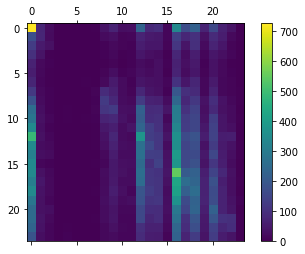

In [72]:
# Crosstab
y_pred = log_reg.predict(testX)
confusionmatrix = confusion_matrix(testY, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix, interpolation='nearest')
fig.colorbar(cax)

In [74]:
# Probabilitas
probability = log_reg.predict_proba(testX)
probability

array([[0.05442725, 0.03533432, 0.0384341 , ..., 0.05723271, 0.04970495,
        0.04496785],
       [0.0431337 , 0.04844366, 0.04450041, ..., 0.06234585, 0.04822472,
        0.03746409],
       [0.05162142, 0.01373144, 0.00576544, ..., 0.03114966, 0.02184651,
        0.02359708],
       ...,
       [0.06843612, 0.0668473 , 0.04842647, ..., 0.06240737, 0.03315803,
        0.04260111],
       [0.07356987, 0.06522003, 0.0495887 , ..., 0.06358081, 0.03305498,
        0.04332781],
       [0.08337652, 0.13810901, 0.07852906, ..., 0.0298406 , 0.0441053 ,
        0.03249539]])

In [75]:
# Koefisien model
print('Intercept: \n', log_reg.intercept_)
print('Coefficients: \n', log_reg.coef_)

Intercept: 
 [ 0.90340534 -0.09145195 -0.61220956 -1.1630313  -1.39547366 -1.21996644
 -0.84025005 -0.40227287  0.0438743  -0.14773671  0.68072717  0.53458371
  0.81042045  0.45661103  0.57947536  0.36353926  0.56240403  0.365003
  0.53120991  0.34456878  0.11395041 -0.03538224 -0.05371999 -0.32827799]
Coefficients: 
 [[-0.39731878 -0.55571507 -0.46552795 ... -0.05257426 -0.0243248
   0.04180599]
 [ 0.26051252 -0.36962177 -0.0462042  ...  0.09042006 -0.07122095
   0.07224313]
 [ 0.6020643  -0.28203663  0.16176783 ...  0.02651574  0.08926877
   0.00304937]
 ...
 [ 0.20378642  0.15862882  0.16971399 ...  0.12006985  0.00866593
  -0.0372404 ]
 [ 0.06846246  0.09355893  0.18274754 ...  0.03884485  0.06435384
  -0.06331838]
 [ 0.08220146 -0.09045661  0.1736164  ... -0.00227054  0.05249356
  -0.06766654]]


In [76]:
# Odd ratio
np.exp(log_reg.coef_)

array([[0.67211974, 0.5736619 , 0.62780357, ..., 0.94878387, 0.97596867,
        1.04269217],
       [1.29759497, 0.69099564, 0.95484696, ..., 1.094634  , 0.93125611,
        1.07491665],
       [1.82588409, 0.75424606, 1.17558728, ..., 1.02687041, 1.09337449,
        1.00305402],
       ...,
       [1.22603627, 1.17190287, 1.1849659 , ..., 1.12757561, 1.00870359,
        0.96344449],
       [1.07086042, 1.09807531, 1.20051129, ..., 1.03960917, 1.06646969,
        0.93864458],
       [1.08567451, 0.91351397, 1.18959914, ..., 0.99773204, 1.05389577,
        0.93457207]])

In [92]:
# Probabilitas kemungkinan waktu kejahatan (detektif shinichi kudo)
det_X=detektif.to_frame().transpose().drop(['HOUR','DISTRICT','OFFENSE_DESCRIPTION','DAY_OF_WEEK','MONTH'], axis=1)
probability_det = log_reg.predict_proba(det_X)
probability_det

array([[0.06745499, 0.03077773, 0.02511328, 0.01653968, 0.01196609,
        0.0161217 , 0.02076531, 0.03022865, 0.04281482, 0.03482733,
        0.042301  , 0.04100513, 0.04944176, 0.04182942, 0.03762625,
        0.03752668, 0.04480729, 0.05303656, 0.05915986, 0.05432366,
        0.06337805, 0.06177087, 0.06901876, 0.04816514]])

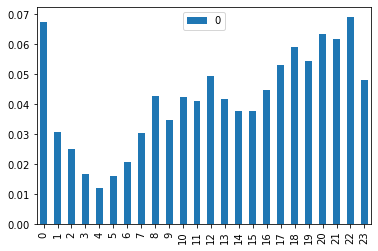

In [108]:
# Bar chart Probabilitas kemungkinan waktu kejahatan (detektif shinichi kudo)
ram = pd.DataFrame.from_dict(probability_det.transpose())    
ram.plot(kind='bar')

In [110]:
# Prediksi waktu kejahatan (detektif shinichi kudo)
log_reg.predict(det_X)

array([22.])